In [1]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list


Toggle code

2023-11-29 19:49:46,746 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (463, 14)


In [5]:
BES_Panel = pd.read_stata(BES_data_folder+"W22_only"+os.sep+"BES2019_W22_v25.0.dta")
dataset_name = "W22_only"

In [6]:
#### get factors - PCA/FA

In [7]:
BES_num = pd.get_dummies(BES_Panel)
BES_num = BES_num[BES_Panel["country"]=="England"]
drop_cols = ['id','wt']
# BES_num.sum().sort_values()[BES_num.sum().sort_values()<200].hist(bins=200)
drop_cols.extend(list(BES_num.sum()[BES_num.sum()<=20].index))
BES_num = BES_num.select_dtypes('number').drop(drop_cols,axis=1) # drop start/finish datetime columns
BES_num = BES_num.fillna(BES_num.mean())

Wall time: 20.1 s


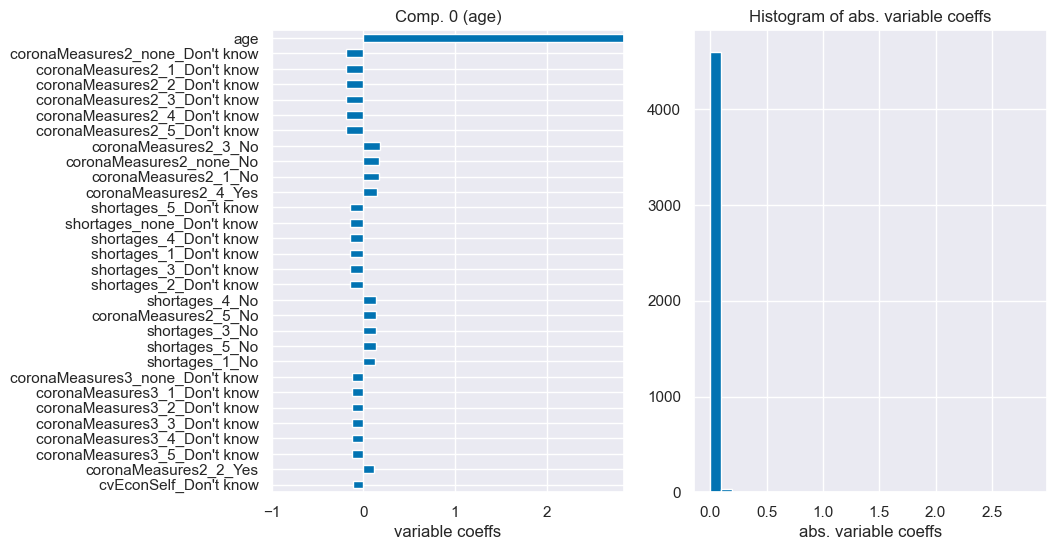

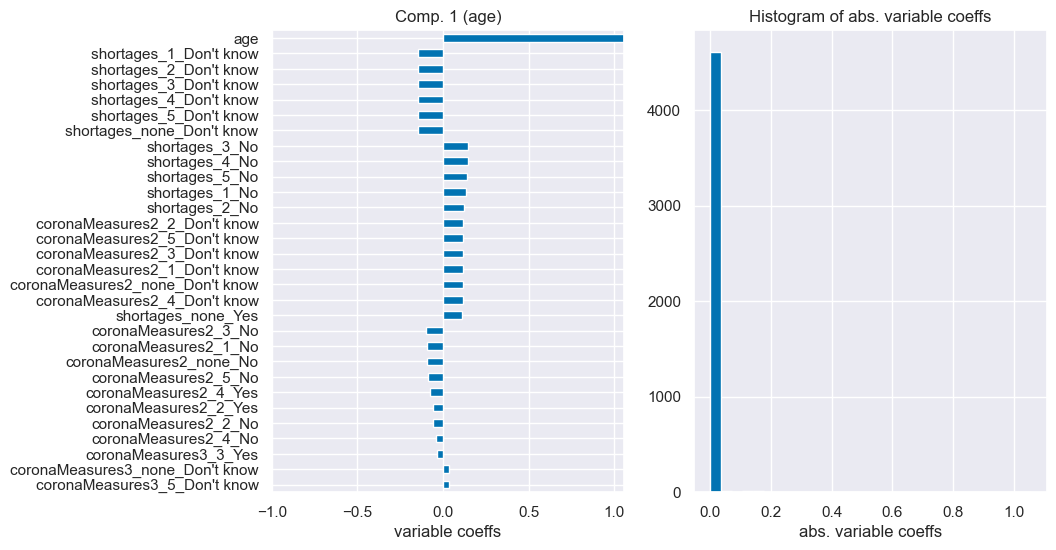

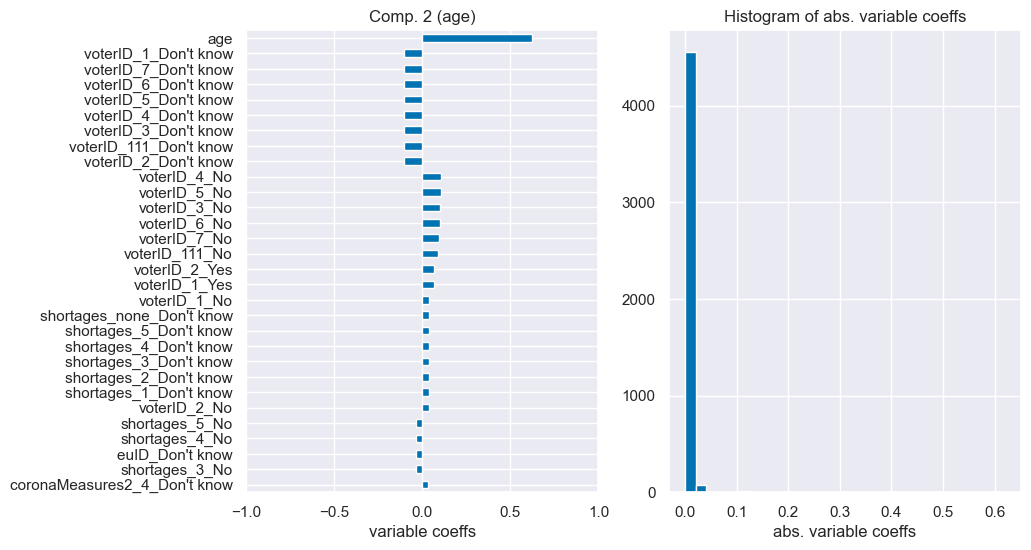

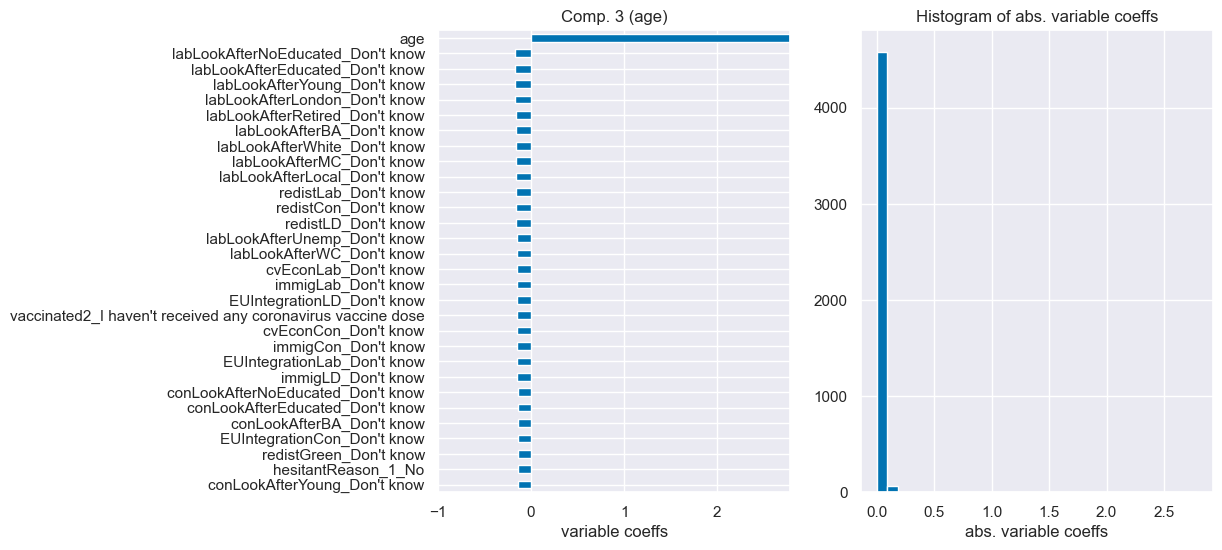

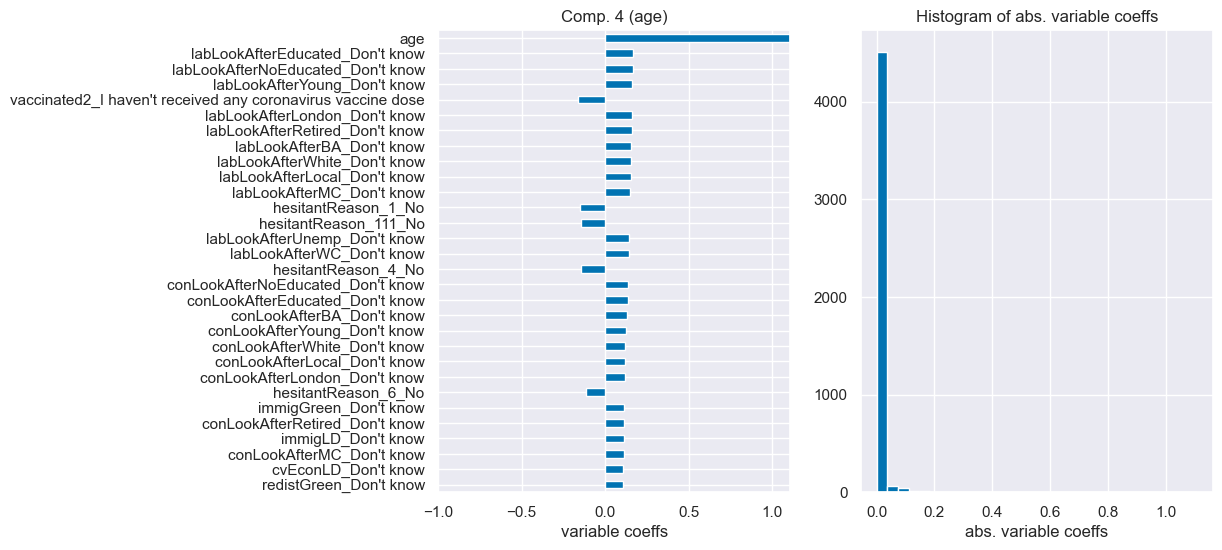

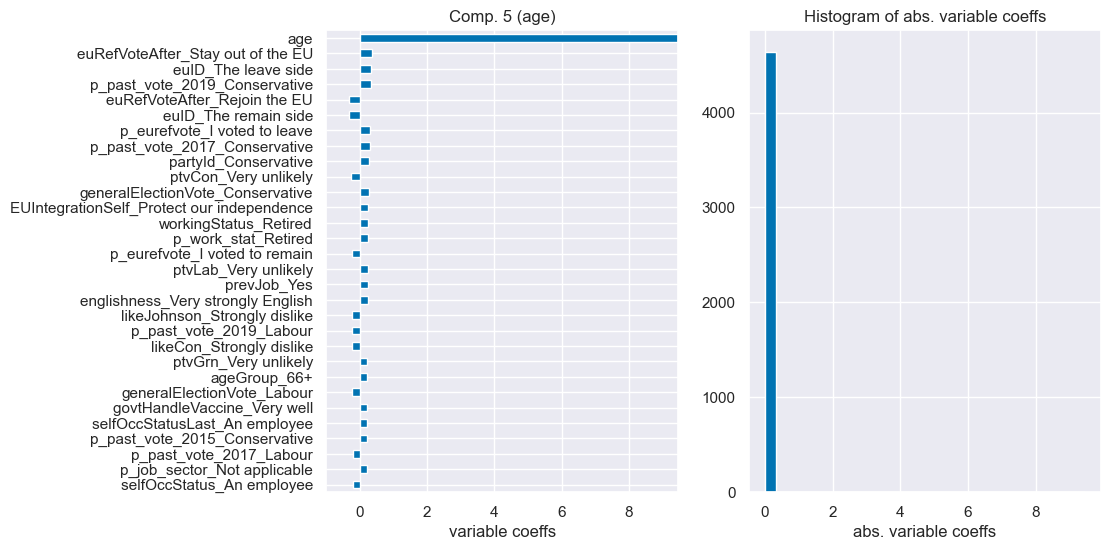

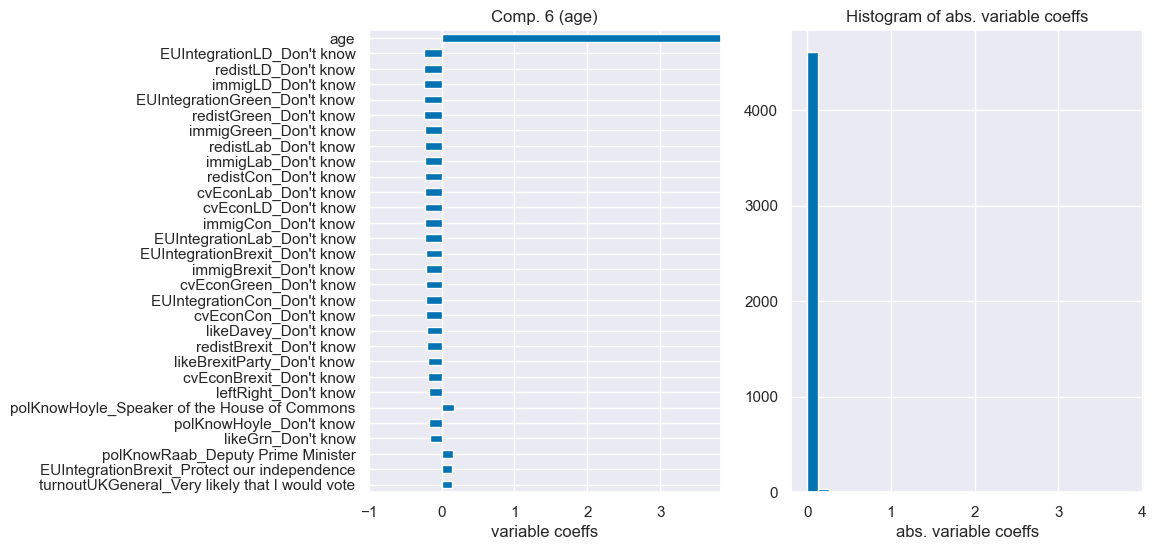

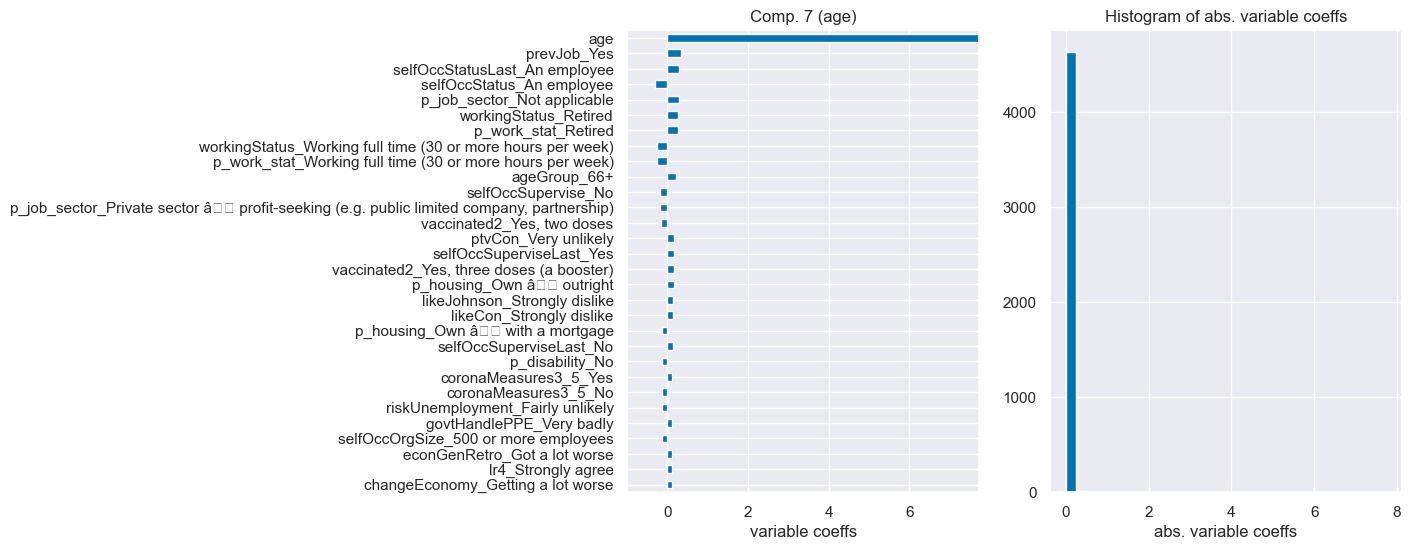

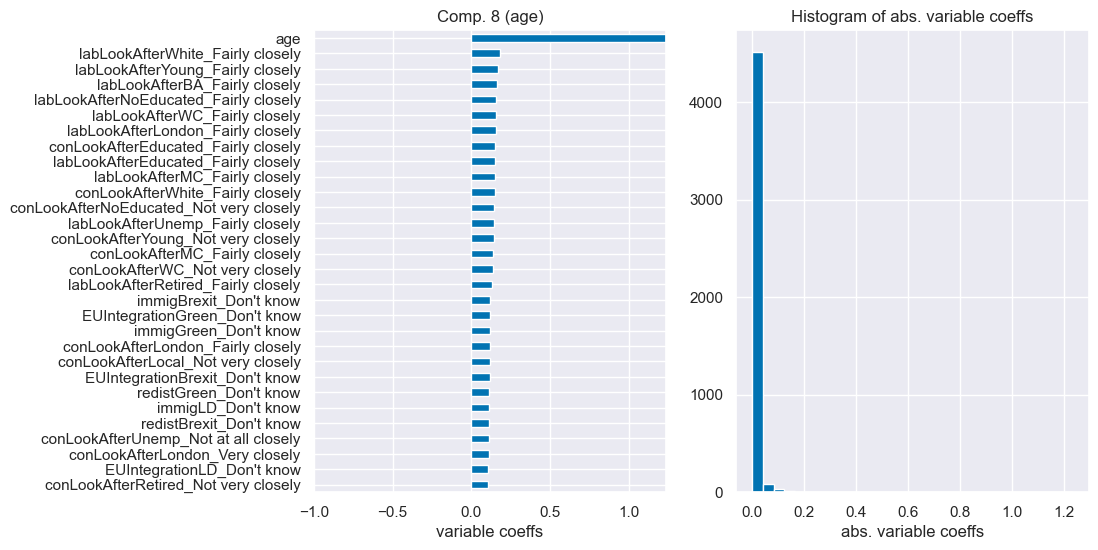

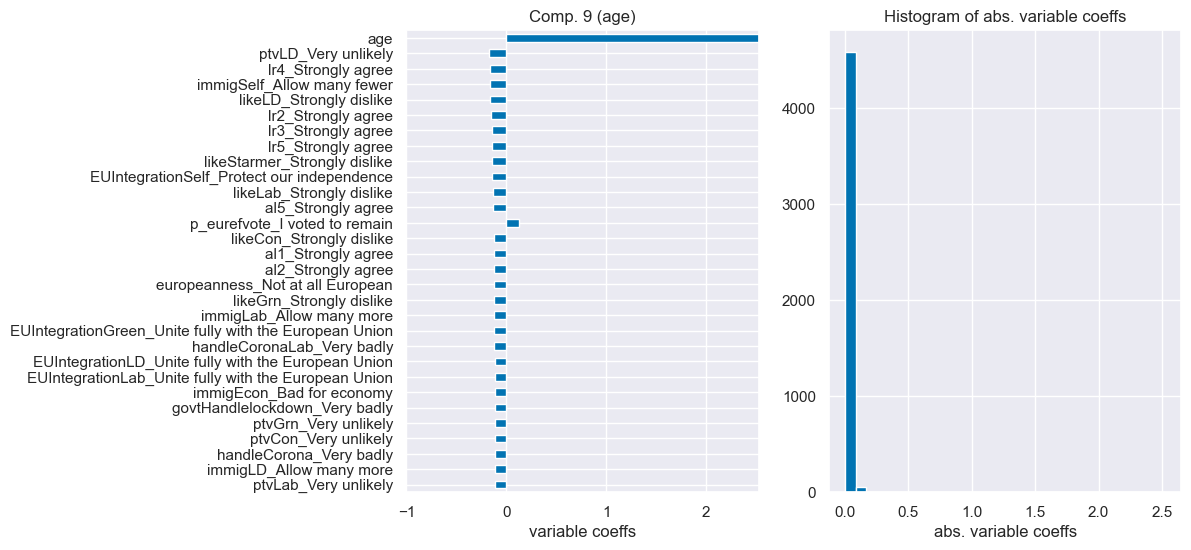

In [8]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

Wall time: 28.4 s


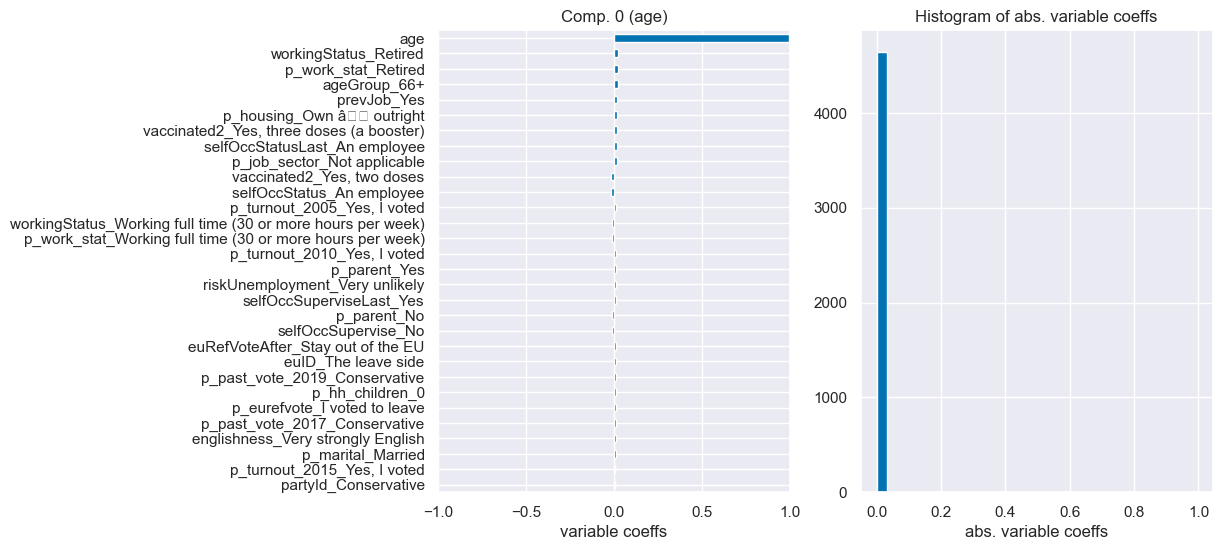

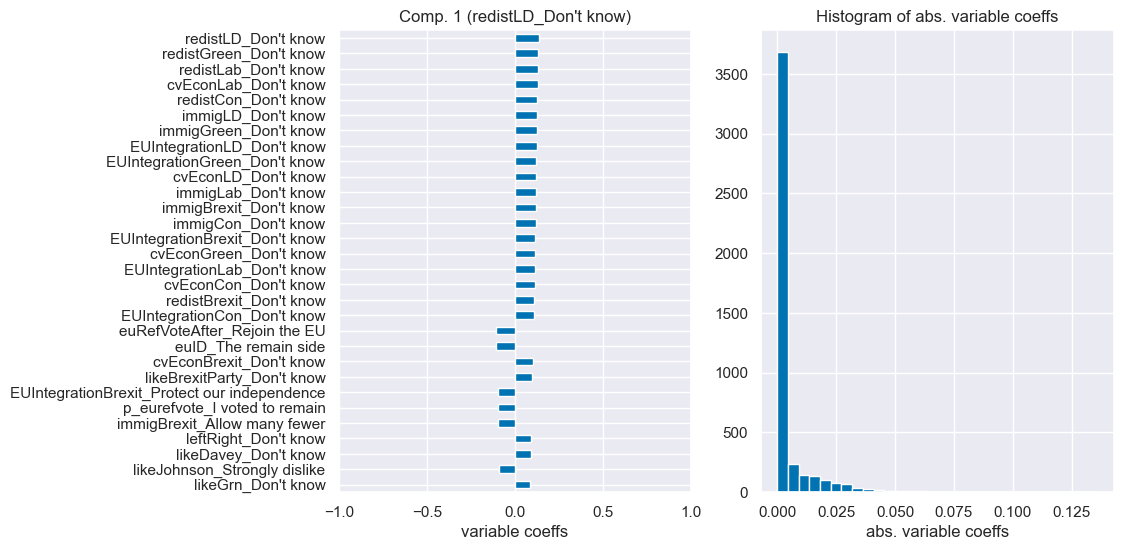

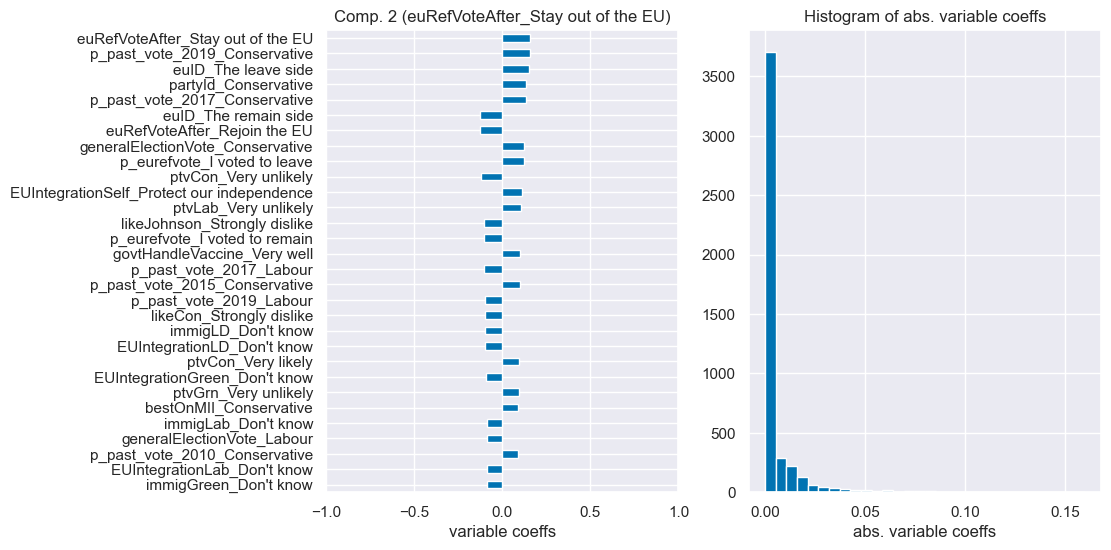

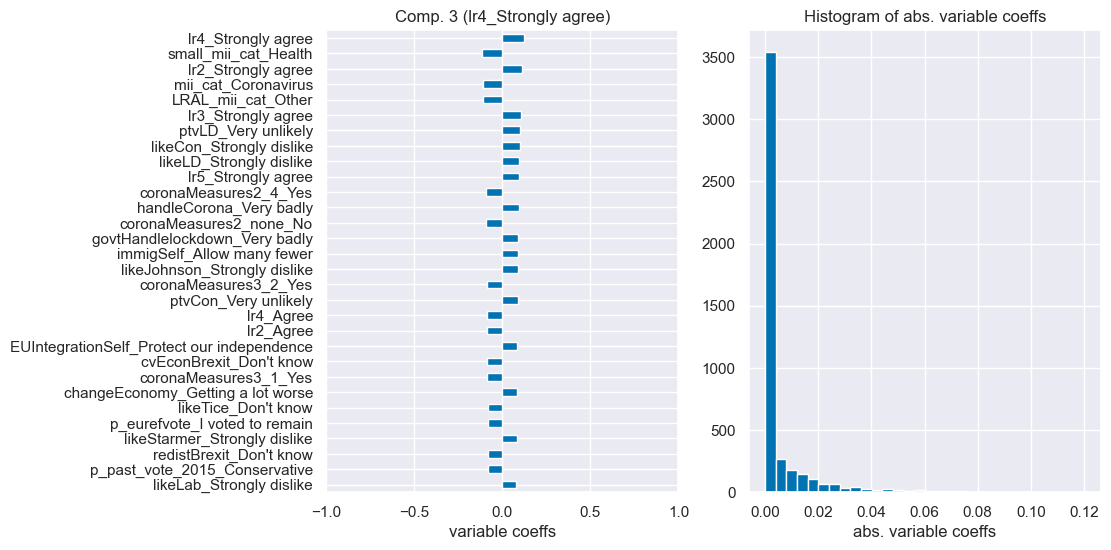

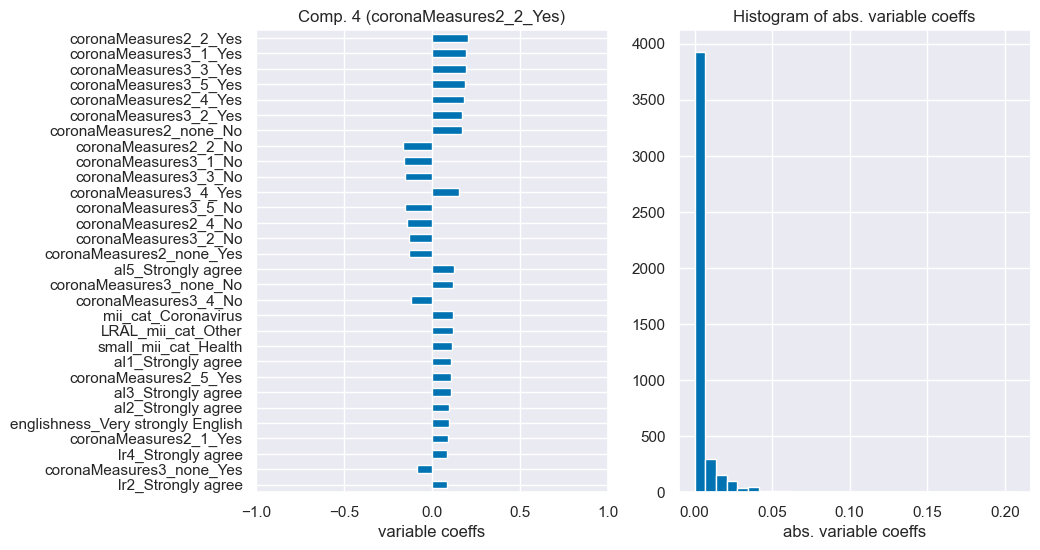

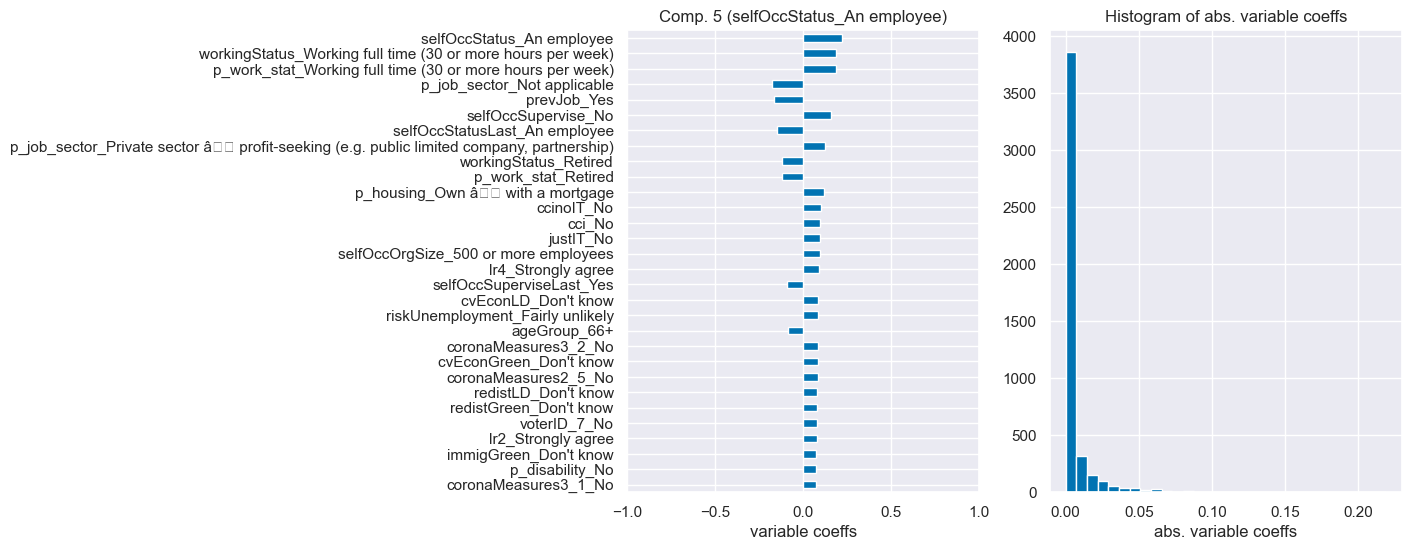

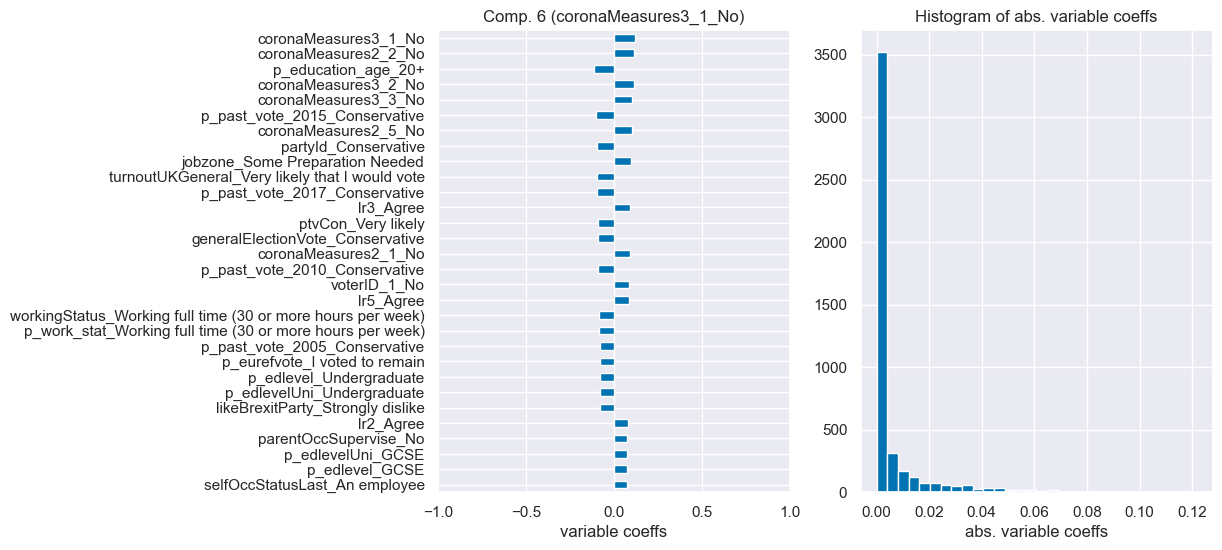

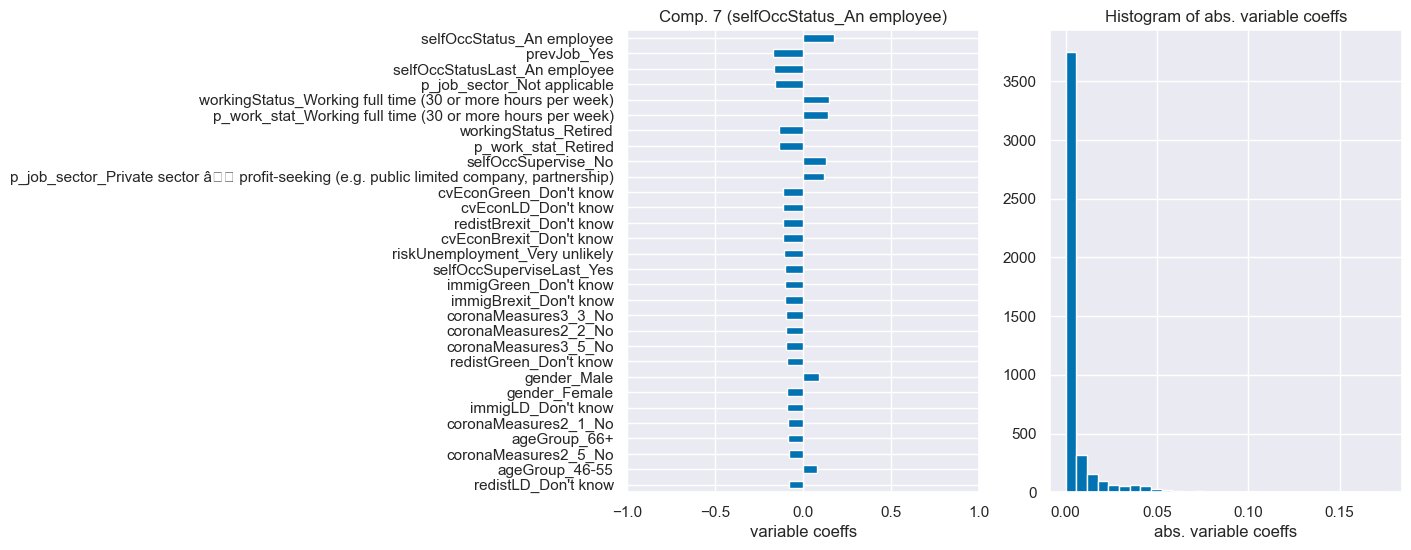

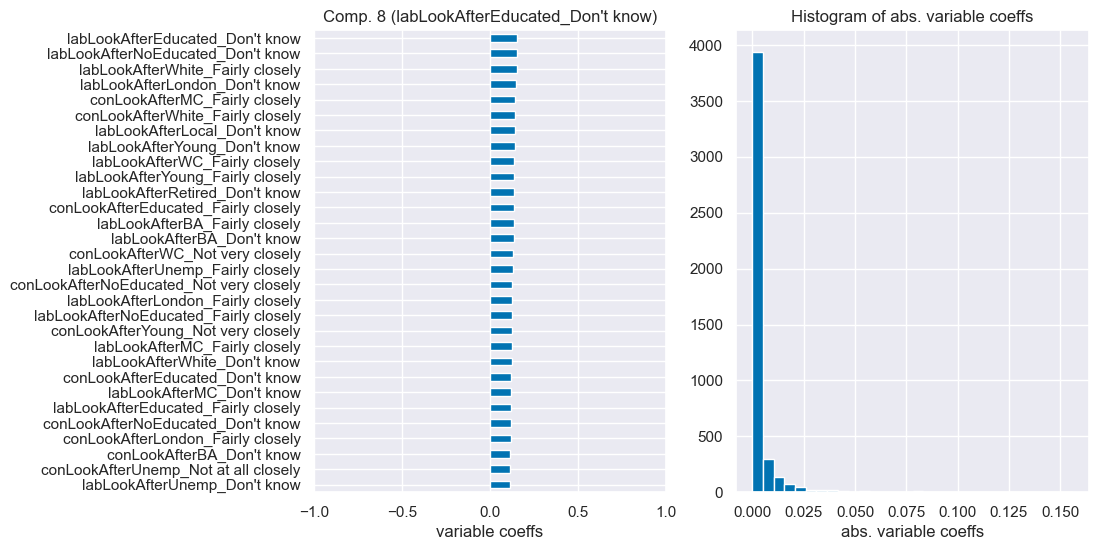

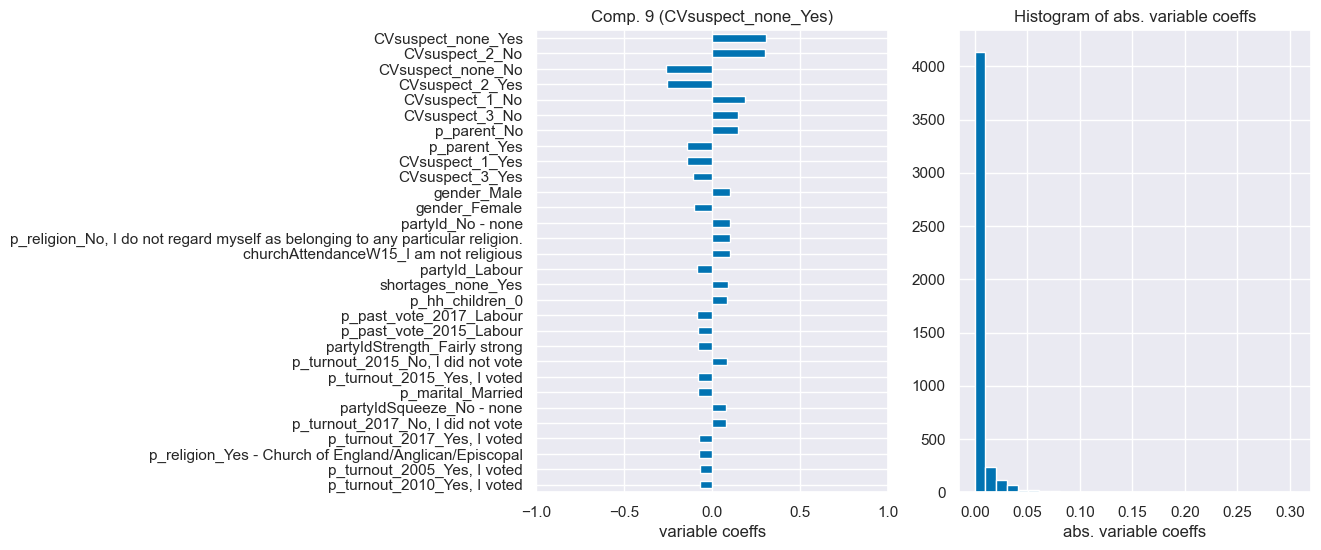

In [9]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

In [ ]:
# W22
# (irish|maltacyprus)Citizen (broadening the vote eligibility variables)
# leavetoremain - settled/pre-settled
# pid(WeTheyb|InterestedOthersb|CriticisePartyb|CommonPartyb) - different from same version without b, not clear why!
# like(Ramsay|Denyer)
# coronaMeasures3_X - extra measures as coronaMeasures1_X,2_X
# <lab|con>LookAfter(Local|London|Young|Retired|Educated|NotEducated)
# integrity(Johnson|Starmer),competent(Johnson|Starmer)
# polKnow(Starmer|Raab|Sunak|Patel|Hoyle)
# occCheckParent - how well does job given describe what your parent did?
# shortages_X - past two weeks, have you note been able to buy X
# coronaDied2 - do you know someone who has died as a result of corona?
# vaccinated2 (option includes booster)

Top 20 positive (spearman) correlations for coronaDied2 r p N 
 
 vaccinated2_Don't know 
 0.110000 
 0.00 
 23326 
 
 
 CVsuspect_3_Yes 
 0.090000 
 0.00 
 23326 
 
 
 coronaMeasures2_none_No 
 0.070000 
 0.00 
 23326 
 
 
 CVsuspect_none_No 
 0.070000 
 0.00 
 23326 
 
 
 voterID_6_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 coronaMeasures3_1_Yes 
 0.060000 
 0.00 
 23326 
 
 
 voterID_5_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 coronaMeasures3_3_Yes 
 0.060000 
 0.00 
 23326 
 
 
 coronaMeasures2_4_Yes 
 0.060000 
 0.00 
 23326 
 
 
 voterID_4_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 vaccinated2_Yes, three doses (a booster) 
 0.060000 
 0.00 
 23326 
 
 
 voterID_3_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 prevJob_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 p_religion_Yes - Islam 
 0.060000 
 0.00 
 23326 
 
 
 shortages_4_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 shortages_2_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 voterID_1_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 voterID_7_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 shortages_1_Don't know 
 0.060000 
 0.00 
 23326 
 
 
 voterID_2_Don't know 
 0.060000 
 0.00 
 23326 
 
 Top 20 negative (spearman) correlations for coronaDied2 r p N 
 
 coronaMeasures2_none_Yes 
 -0.090000 
 0.00 
 23326 
 
 
 CVsuspect_none_Yes 
 -0.090000 
 0.00 
 23326 
 
 
 CVsuspect_3_No 
 -0.090000 
 0.00 
 23326 
 
 
 coronaMeasures3_none_Yes 
 -0.080000 
 0.00 
 23326 
 
 
 churchAttendanceW15_I am not religious 
 -0.080000 
 0.00 
 23326 
 
 
 coronaMeasures2_4_No 
 -0.080000 
 0.00 
 23326 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.080000 
 0.00 
 23326 
 
 
 p_ethnicity_White British 
 -0.080000 
 0.00 
 23326 
 
 
 shortages_3_No 
 -0.070000 
 0.00 
 23326 
 
 
 coronaMeasures3_4_No 
 -0.070000 
 0.00 
 23326 
 
 
 shortages_4_No 
 -0.070000 
 0.00 
 23326 
 
 
 shortages_1_No 
 -0.070000 
 0.00 
 23326 
 
 
 shortages_none_Yes 
 -0.070000 
 0.00 
 23326 
 
 
 coronaMeasures2_2_No 
 -0.070000 
 0.00 
 23326 
 
 
 coronaMeasures3_3_No 
 -0.070000 
 0.00 
 23326 
 
 
 cvEconSelf_Save the economy even if it increases[...] 
 -0.070000 
 0.00 
 23326 
 
 
 coronaMeasures3_1_No 
 -0.070000 
 0.00 
 23326 
 
 
 shortages_5_No 
 -0.060000 
 0.00 
 23326 
 
 
 vaccinated2_Yes, two doses 
 -0.060000 
 0.00 
 23326 
 
 
 CVsuspect_2_No 
 -0.060000 
 0.00 
 23326

MSE: 0.20, MAE: 0.36, EV: 0.08, R2: 0.08


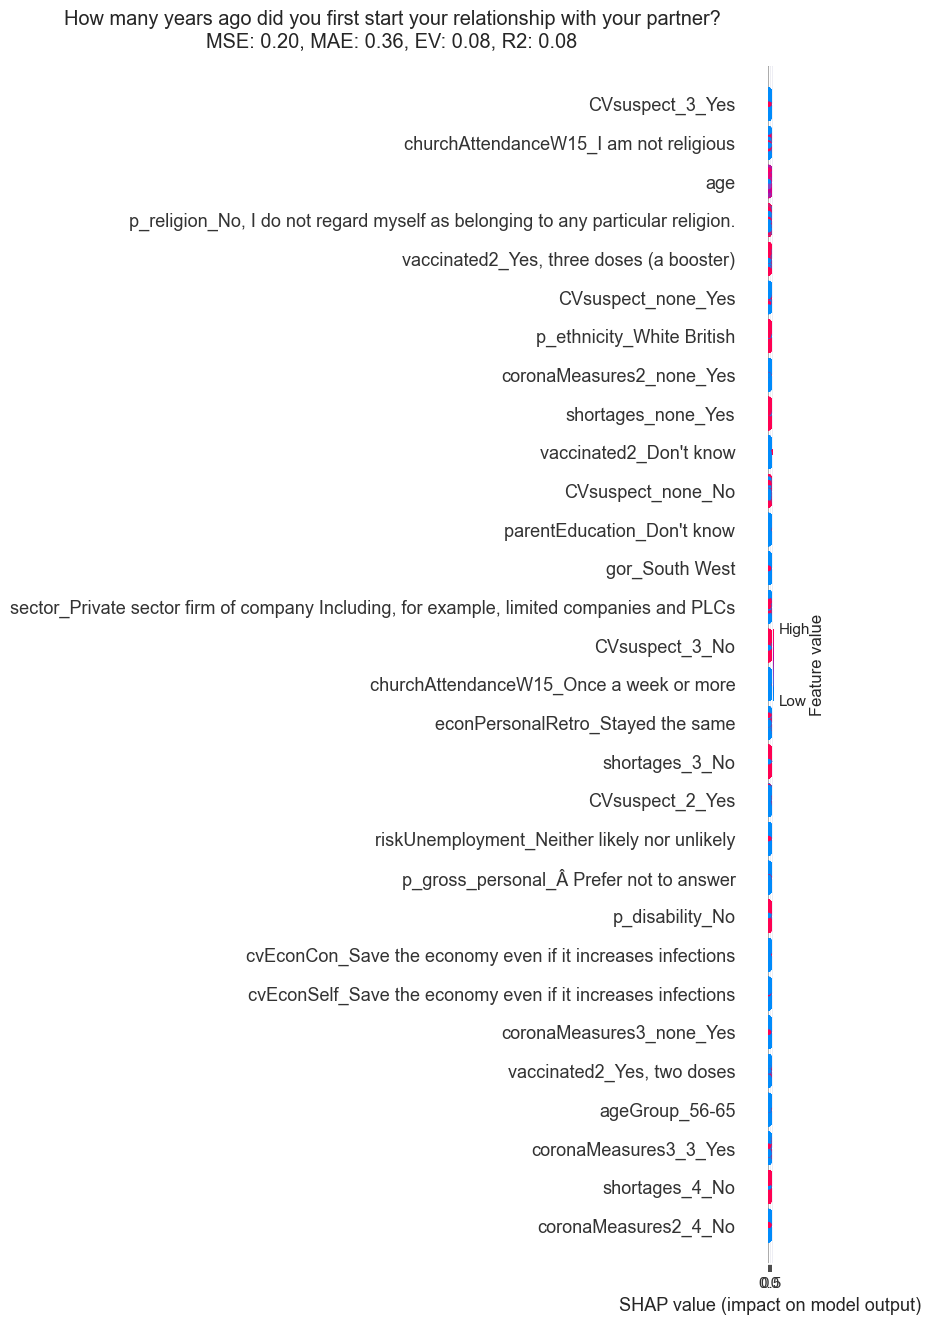

In [10]:
# coronaDied2
name="coronaDied2"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for shortages_1 r p N 
 
 shortages_none_No 
 0.510000 
 0.00 
 22921 
 
 
 shortages_3_Yes 
 0.160000 
 0.00 
 22921 
 
 
 shortages_4_Yes 
 0.160000 
 0.00 
 22921 
 
 
 econPersonalRetro_Got a lot worse 
 0.150000 
 0.00 
 22921 
 
 
 shortages_2_Yes 
 0.150000 
 0.00 
 22921 
 
 
 changeEconomy_Getting a lot worse 
 0.120000 
 0.00 
 22921 
 
 
 riskPoverty_Very likely 
 0.120000 
 0.00 
 22921 
 
 
 econGenRetro_Got a lot worse 
 0.120000 
 0.00 
 22921 
 
 
 changeCorona_Getting a lot worse 
 0.110000 
 0.00 
 22921 
 
 
 likeCon_Strongly dislike 
 0.100000 
 0.00 
 22921 
 
 
 govtHandleTesting_Very badly 
 0.100000 
 0.00 
 22921 
 
 
 effectsRemainFinance_Much better 
 0.100000 
 0.00 
 22921 
 
 
 cvEconCon_Save the economy even if it increases[...] 
 0.100000 
 0.00 
 22921 
 
 
 govtHandlePPE_Very badly 
 0.100000 
 0.00 
 22921 
 
 
 likeJohnson_Strongly dislike 
 0.100000 
 0.00 
 22921 
 
 
 lr3_Strongly agree 
 0.100000 
 0.00 
 22921 
 
 
 handleCorona_Very badly 
 0.100000 
 0.00 
 22921 
 
 
 govtHandlelockdown_Very badly 
 0.090000 
 0.00 
 22921 
 
 
 effectsRemainEcon_Much better 
 0.090000 
 0.00 
 22921 
 
 
 p_disability_Yes, limited a lot 
 0.090000 
 0.00 
 22921 
 
 Top 20 negative (spearman) correlations for shortages_1 r p N 
 
 shortages_none_Yes 
 -0.510000 
 0.00 
 22921 
 
 
 shortages_4_No 
 -0.160000 
 0.00 
 22921 
 
 
 shortages_3_No 
 -0.160000 
 0.00 
 22921 
 
 
 shortages_2_No 
 -0.150000 
 0.00 
 22921 
 
 
 integrityJohnson 
 -0.110000 
 0.00 
 5222 
 
 
 effectsRemainFinance_About the same 
 -0.100000 
 0.00 
 22921 
 
 
 econPersonalRetro_Stayed the same 
 -0.100000 
 0.00 
 22921 
 
 
 riskPoverty_Very unlikely 
 -0.100000 
 0.00 
 22921 
 
 
 govtHandleVaccine_Very well 
 -0.090000 
 0.00 
 22921 
 
 
 riskUnemployment_Very unlikely 
 -0.090000 
 0.00 
 22921 
 
 
 p_past_vote_2019_Conservative 
 -0.080000 
 0.00 
 22921 
 
 
 p_past_vote_2017_Conservative 
 -0.080000 
 0.00 
 22921 
 
 
 p_disability_No 
 -0.080000 
 0.00 
 22921 
 
 
 partyId_Conservative 
 -0.080000 
 0.00 
 22921 
 
 
 euID_The leave side 
 -0.070000 
 0.00 
 22921 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.070000 
 0.00 
 22921 
 
 
 coronaMeasures2_3_No 
 -0.070000 
 0.00 
 22921 
 
 
 generalElectionVote_Conservative 
 -0.070000 
 0.00 
 22921 
 
 
 handleCorona_Quite well 
 -0.070000 
 0.00 
 22921 
 
 
 p_hh_children_0 
 -0.070000 
 0.00 
 22921

MSE: 0.03, MAE: 0.07, EV: 0.64, R2: 0.64


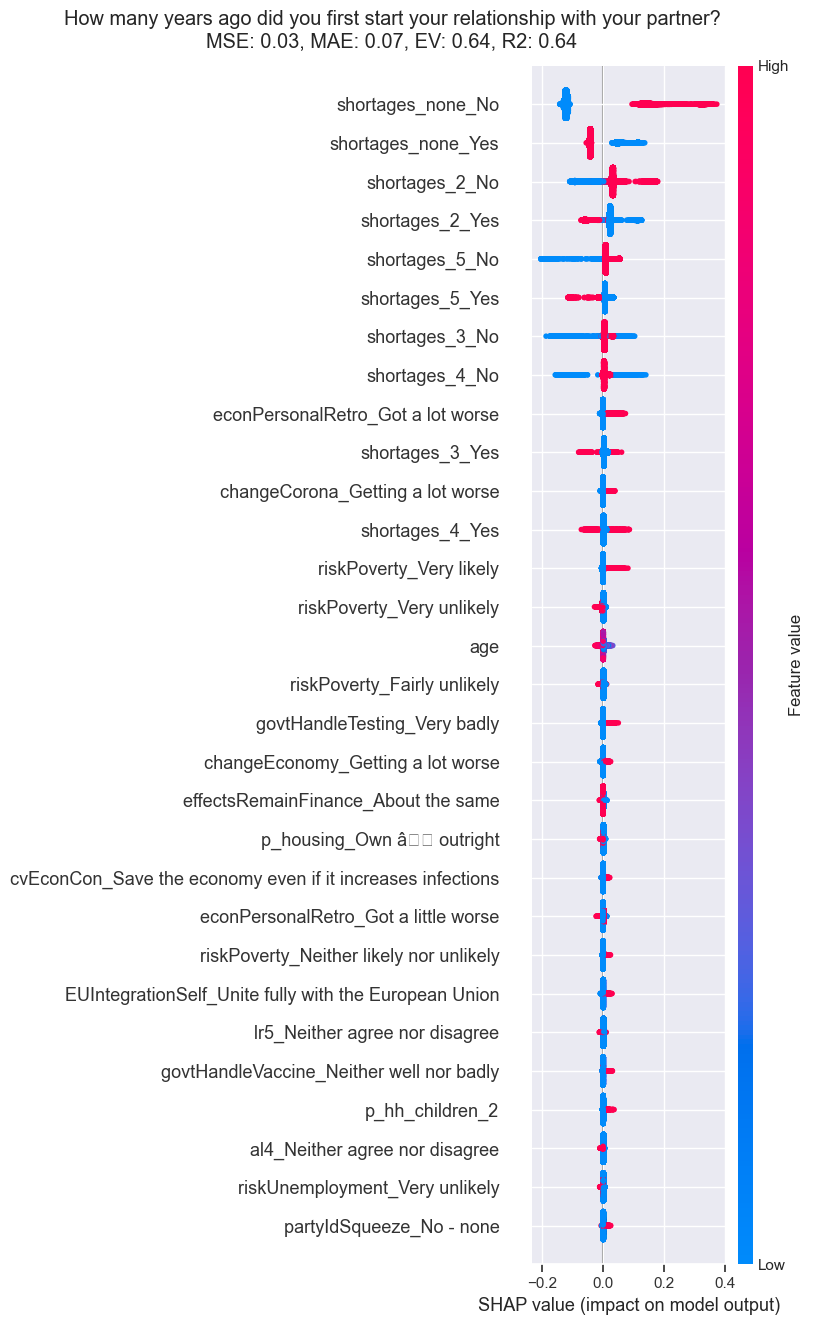

In [12]:
# shortages_1
name="shortages_1"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for integrityJohnson r p N 
 
 generalElectionVote_Conservative 
 0.620000 
 0.00 
 5430 
 
 
 partyId_Conservative 
 0.550000 
 0.00 
 5430 
 
 
 p_past_vote_2019_Conservative 
 0.540000 
 0.00 
 5430 
 
 
 ptvCon_Very likely 
 0.510000 
 0.00 
 5430 
 
 
 handleCorona_Quite well 
 0.510000 
 0.00 
 5430 
 
 
 bestOnMII_Conservative 
 0.500000 
 0.00 
 5430 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.470000 
 0.00 
 5430 
 
 
 p_past_vote_2017_Conservative 
 0.460000 
 0.00 
 5430 
 
 
 euID_The leave side 
 0.440000 
 0.00 
 5430 
 
 
 govtHandleVaccine_Very well 
 0.430000 
 0.00 
 5430 
 
 
 govtHandlelockdown_Quite well 
 0.410000 
 0.00 
 5430 
 
 
 p_past_vote_2015_Conservative 
 0.360000 
 0.00 
 5430 
 
 
 p_eurefvote_I voted to leave 
 0.360000 
 0.00 
 5430 
 
 
 likeJohnson_8 
 0.350000 
 0.00 
 5430 
 
 
 competentJohnson_7 
 0.350000 
 0.00 
 5430 
 
 
 govtHandlePPE_Quite well 
 0.350000 
 0.00 
 5430 
 
 
 conUnited_Fairly united 
 0.330000 
 0.00 
 5430 
 
 
 competentJohnson_8 
 0.330000 
 0.00 
 5430 
 
 
 likeCon_8 
 0.330000 
 0.00 
 5430 
 
 
 ptvLab_Very unlikely 
 0.330000 
 0.00 
 5430 
 
 Top 20 negative (spearman) correlations for integrityJohnson r p N 
 
 competentJohnson_No competence at all 
 -0.690000 
 0.00 
 5430 
 
 
 likeJohnson_Strongly dislike 
 -0.680000 
 0.00 
 5430 
 
 
 likeCon_Strongly dislike 
 -0.610000 
 0.00 
 5430 
 
 
 ptvCon_Very unlikely 
 -0.610000 
 0.00 
 5430 
 
 
 handleCorona_Very badly 
 -0.540000 
 0.00 
 5430 
 
 
 govtHandlePPE_Very badly 
 -0.490000 
 0.00 
 5430 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.460000 
 0.00 
 5430 
 
 
 govtHandleTrace_Very badly 
 -0.450000 
 0.00 
 5430 
 
 
 euID_The remain side 
 -0.440000 
 0.00 
 5430 
 
 
 p_past_vote_2019_Labour 
 -0.420000 
 0.00 
 5430 
 
 
 govtHandlelockdown_Very badly 
 -0.420000 
 0.00 
 5430 
 
 
 generalElectionVote_Labour 
 -0.410000 
 0.00 
 5430 
 
 
 lr4_Strongly agree 
 -0.410000 
 0.00 
 5430 
 
 
 redistCon_Government should be less concerned[...] 
 -0.360000 
 0.00 
 5430 
 
 
 partyId_Labour 
 -0.350000 
 0.00 
 5430 
 
 
 p_past_vote_2017_Labour 
 -0.350000 
 0.00 
 5430 
 
 
 bestOnMII_Labour 
 -0.340000 
 0.00 
 5430 
 
 
 cvEconCon_Save the economy even if it increases[...] 
 -0.340000 
 0.00 
 5430 
 
 
 ptvLab_Very likely 
 -0.340000 
 0.00 
 5430 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 -0.330000 
 0.00 
 5430

MSE: 1.51, MAE: 0.83, EV: 0.83, R2: 0.83


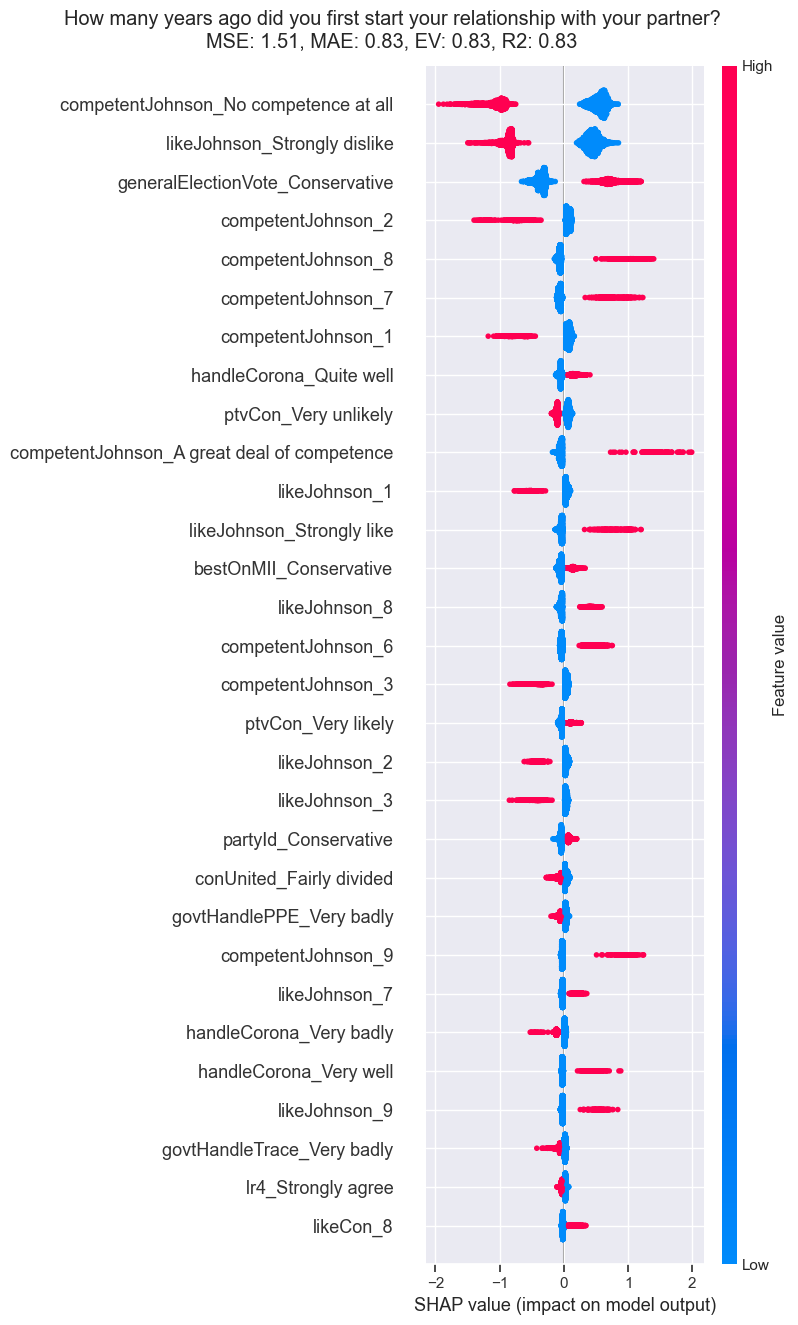

In [11]:
# integrityJohnson
name="integrityJohnson"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)